In [1]:
%%time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn  
import pandas as pd
import sqlite3
import sqlalchemy

CPU times: user 1.78 s, sys: 613 ms, total: 2.4 s
Wall time: 3.94 s


In [2]:
%%time
radacct = pd.read_csv('radacct 2.csv', dtype=object)
radacct.shape
radacct.head(2)
#radacct = pd.read_csv('radacct 2.csv', low_memory=False)
#radacct.shape
#radacct.head

CPU times: user 2min 39s, sys: 1min 21s, total: 4min 1s
Wall time: 4min 13s


,radacctid,acctsessionid,acctuniqueid,username,realm,nasipaddress,nasportid,nasporttype,acctstarttime,acctupdatetime,...,calledstationid,callingstationid,acctterminatecause,servicetype,framedprotocol,framedipaddress,framedipv6address,framedipv6prefix,framedinterfaceid,delegatedipv6prefix
0,1,00000018,1af6b39080572ab9a9e924f6b0929356,b3b114de96b0dce6a355d39a6b957b65,NaN,77f64d99c9ae4fa,Uniq-Sess-ID1,Virtual,2020-07-19 15:54:04,2020-07-19 15:54:04,...,NaN,NaN,Port-Error,Framed-User,PPP,e78c393dc6a5e77,NaN,NaN,NaN,NaN
1,2,0000001F,7fe1449dceaffa6099f04a3100c0cf39,b273a4f8038954375f9041e021597f2a,NaN,77f64d99c9ae4fa,Uniq-Sess-ID4,Virtual,2020-07-19 15:54:11,2020-07-19 15:54:11,...,NaN,NaN,Port-Error,Framed-User,PPP,1d8d7e50cccc815,NaN,NaN,NaN,NaN


In [3]:
radacct.shape

(26231595, 28)

In [3]:
%%time
radacct_extract = radacct[['acctstarttime', 'acctstoptime','acctinputoctets', 'acctoutputoctets']]
radacct_extract.shape

CPU times: user 1.48 s, sys: 3.12 s, total: 4.6 s
Wall time: 6.11 s


(26231595, 4)

In [4]:
%%time 
# save as csv file
radacct_extract.to_csv('radacct_extract.csv')


CPU times: user 1min 14s, sys: 2.43 s, total: 1min 16s
Wall time: 1min 17s


In [5]:
%%time
#calling the new file
radacct_extract = pd.read_csv('radacct_extract.csv', index_col =0)
radacct_extract.head(2)

CPU times: user 27.2 s, sys: 8.61 s, total: 35.8 s
Wall time: 41.4 s


,acctstarttime,acctstoptime,acctinputoctets,acctoutputoctets
radacctid,,,,
1,2020-07-19 15:54:04,2020-07-20 12:19:52,145570,331594
2,2020-07-19 15:54:11,2020-07-19 16:24:04,3518,7770


In [6]:
%%time
radacct_extract['acctstarttime2'] = pd.to_datetime(radacct_extract['acctstarttime'])
radacct_extract['acctstoptime2'] = pd.to_datetime(radacct_extract['acctstoptime'])
radacct_extract['newStarttime'] = radacct_extract['acctstarttime2'].dt.strftime('%d-%m-%Y')
radacct_extract['newStoptime'] = radacct_extract['acctstoptime2'].dt.strftime('%d-%m-%Y')
radacct_extract['month'] = radacct_extract['acctstarttime2'].dt.strftime('%B')
radacct_extract['week_number'] = radacct_extract['acctstarttime2'].dt.isocalendar().week
radacct_extract['year'] = radacct_extract['acctstarttime2'].dt.strftime('%y')
#radacct_extract[['year_20', 'year_21']] = radacct_extract['year'].apply(lambda x: pd.Series(str(x).split(" ")))
#radacct_extract['per_year'] = radacct_extract.year.apply(pd.Series).add_prefix('year_')
radacct_extract.head(3)

CPU times: user 9min 29s, sys: 6.28 s, total: 9min 35s
Wall time: 9min 36s


,acctstarttime,acctstoptime,acctinputoctets,acctoutputoctets,acctstarttime2,acctstoptime2,newStarttime,newStoptime,month,week_number,year
radacctid,,,,,,,,,,,
1,2020-07-19 15:54:04,2020-07-20 12:19:52,145570,331594,2020-07-19 15:54:04,2020-07-20 12:19:52,19-07-2020,20-07-2020,July,29,20
2,2020-07-19 15:54:11,2020-07-19 16:24:04,3518,7770,2020-07-19 15:54:11,2020-07-19 16:24:04,19-07-2020,19-07-2020,July,29,20
3,2020-07-19 15:54:11,2020-07-19 15:57:12,100427,390874,2020-07-19 15:54:11,2020-07-19 15:57:12,19-07-2020,19-07-2020,July,29,20


In [7]:
Daily_uploads = radacct_extract.groupby('newStarttime').sum()
Daily_uploads

,acctinputoctets,acctoutputoctets,week_number
newStarttime,,,
01-01-2021,14788124362816,197012477878917,1731033
01-02-2021,12849477378293,172126036750679,197715
01-03-2021,14595387254028,183428853413898,493308
01-04-2021,15574927756694,205997488555666,697827
01-05-2021,15190711073132,211465145579785,874208
...,...,...,...
31-08-2020,12534834290044,173696142124121,2223468
31-08-2021,11002389061279,151931775621718,1619520
31-10-2020,9705893742125,137781903825041,1620256


In [76]:
wkly_uploads = radacct_extract.groupby(['week_number','year'], as_index=False).sum()
wkly_uploads

,week_number,year,acctinputoctets,acctoutputoctets
0,1,21,95761591925580,1275731660068332
1,2,21,90157718934394,1242458559142802
2,3,21,103111769777795,1396025171921468
3,4,21,95647667623384,1312131166384484
4,5,21,95731827134909,1301456204273497
...,...,...,...,...
69,50,20,97661451833171,1278207242985388
70,51,20,99197341012975,1275429094927858
71,52,20,98476462461420,1256900030345610
72,53,20,60544346231888,774342247877677


In [106]:
#Converting Account Octet from megabyte to gigabyte
wkly_uploads['acctinputoctets'] = wkly_uploads['acctinputoctets']/1000 #assuming unit is in megabyte
wkly_uploads['acctoutputoctets'] = wkly_uploads['acctoutputoctets']/1000 #assuming unit is in megabyte

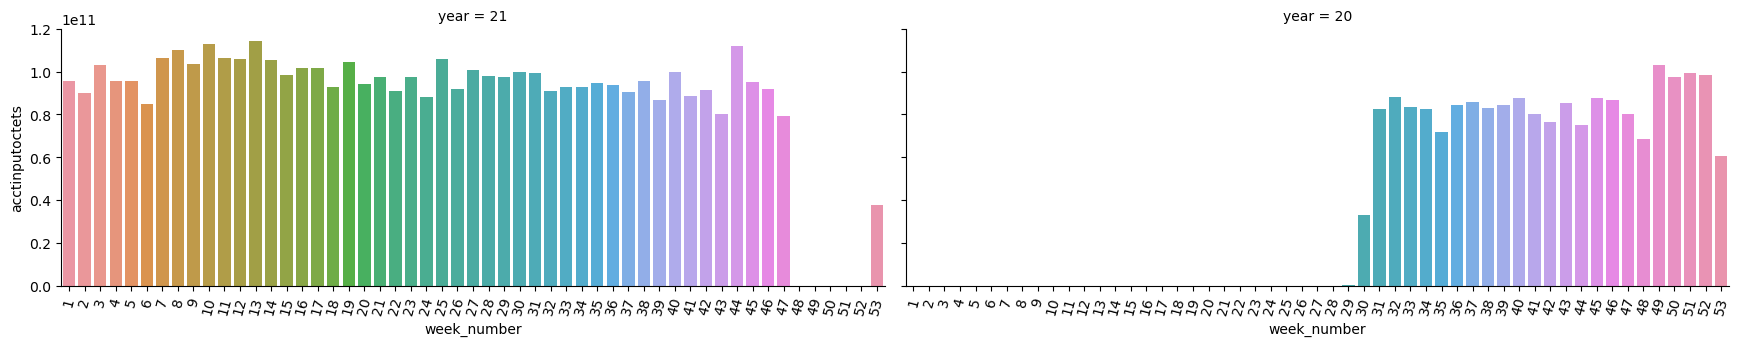

In [107]:
ax = sns.catplot(x="week_number", y="acctinputoctets", col="year",
                 data=wkly_uploads, kind="bar",
                 height=3.5, aspect=2.5)
ax.set_xticklabels(rotation=75)

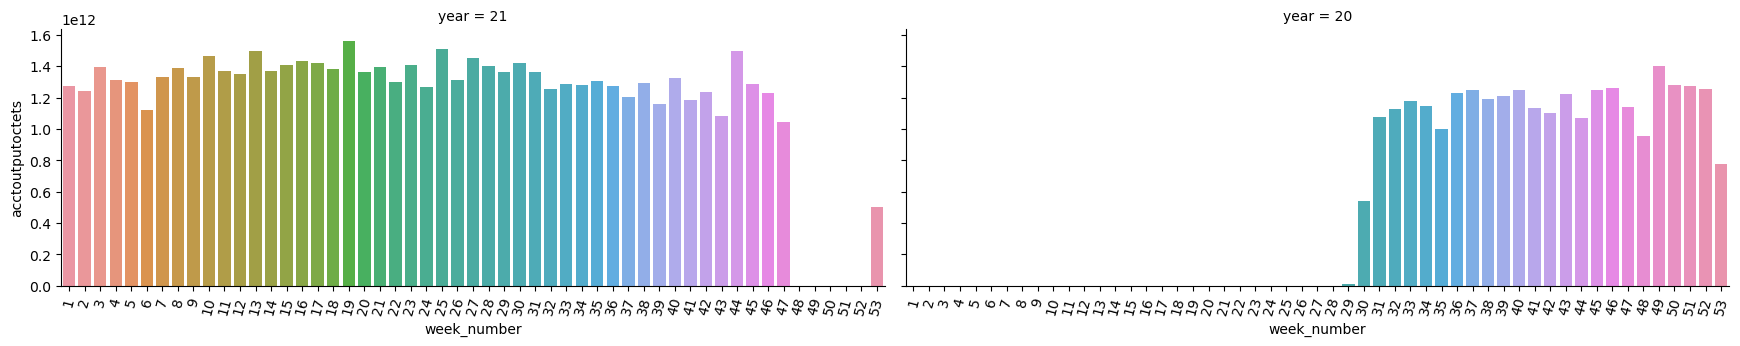

In [109]:
ax = sns.catplot(x="week_number", y="acctoutputoctets", col="year",
                 data=wkly_uploads, kind="bar",
                 height=3.5, aspect=2.5)
ax.set_xticklabels(rotation=75)

In [97]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [110]:
wkly_uploads2 = pd.concat([wkly_uploads, wkly_uploads], axis=0)
wkly_uploads2.reset_index(inplace=True)
wkly_uploads2.drop('index', axis=1, inplace=True)

wkly_uploads2.iloc[74:148,2] = wkly_uploads2.iloc[0:74,3]

wkly_uploads2.iloc[74:148,3] = 'output'
wkly_uploads2.iloc[0:74,3] = 'input'

wkly_uploads2.columns = ['week_number', 'year', 'value', 'acctoctets']
wkly_uploads2

,week_number,year,value,acctoctets
0,1,21,95761591925.6,input
1,2,21,90157718934.4,input
2,3,21,103111769777.8,input
3,4,21,95647667623.4,input
4,5,21,95731827134.9,input
...,...,...,...,...
143,50,20,1278207242985.4,output
144,51,20,1275429094927.9,output
145,52,20,1256900030345.6,output
146,53,20,774342247877.7,output


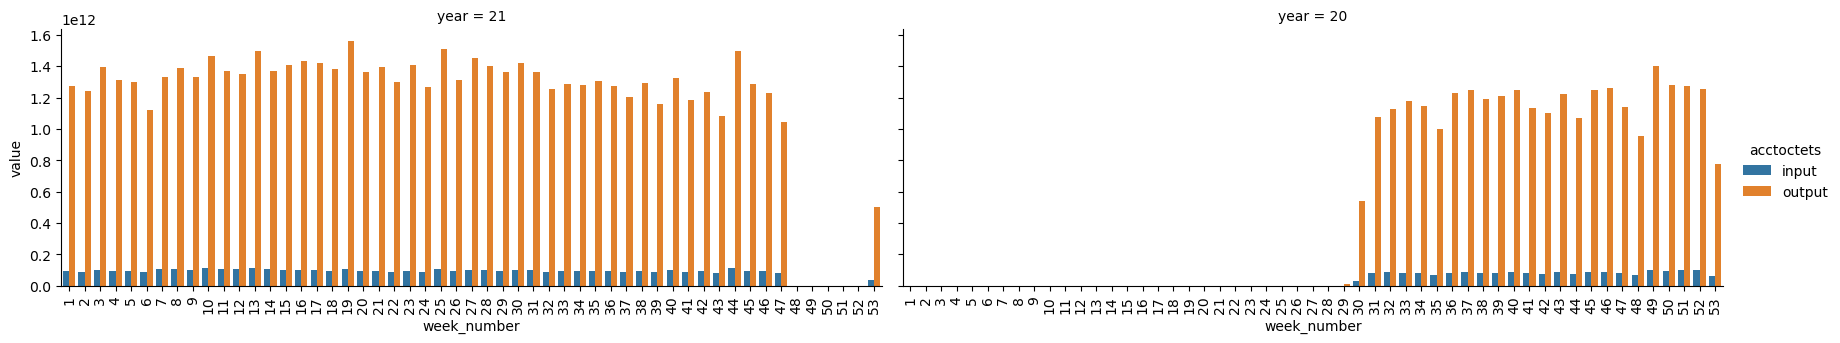

In [112]:
ax = sns.catplot(x="week_number", y="value",
                 hue="acctoctets", col="year",
                 data=wkly_uploads2, kind="bar",
                 height=3.5, aspect=2.5)
ax.set_xticklabels(rotation=90)

In [23]:
radacct_july = Daily_uploads[Daily_uploads.index.str.contains('07-2020', na=False)]
radacct_july/1000

,acctinputoctets,acctoutputoctets,week_number
newStarttime,,,
19-07-2020,6.043572e+08,9.670672e+09,66.816
20-07-2020,2.388940e+09,3.914656e+10,146.7
21-07-2020,1.540658e+09,2.586311e+10,147.93
22-07-2020,4.548922e+09,7.652564e+10,304.05
23-07-2020,4.387230e+09,7.357405e+10,511.14
24-07-2020,2.246301e+09,3.820864e+10,375.9
25-07-2020,2.404705e+09,3.854282e+10,471.15
26-07-2020,1.535841e+10,2.489469e+11,1604.16
27-07-2020,1.155866e+10,1.838110e+11,1668.947


In [113]:
%%time
mnthly_uploads = radacct_extract.groupby(['month','year'], as_index=False).sum()
mnthly_uploads

CPU times: user 3.77 s, sys: 933 ms, total: 4.71 s
Wall time: 4.73 s


,month,year,acctinputoctets,acctoutputoctets,week_number
0,April,21,443005320453078,6071925195962864,23530581
1,August,20,369464566041585,5015662060665938,42517367
2,August,21,413235690601587,5695286549011881,52955982
3,December,20,424921150913217,5516372733084327,59539192
4,February,21,397459168673524,5142732776894354,9897334
5,January,21,422555619482457,5727811459383463,8414678
6,July,20,85210538090408,1239965776360767,10320901
7,July,21,434733464811140,6200103323693720,47718895
8,June,21,407880630609755,5837397015490369,37095694
9,March,21,479896584755613,6183680865013027,18870028


In [43]:
import seaborn as sns

In [114]:
#Converting Account Octet from megabyte to gigabyte
mnthly_uploads['acctinputoctets'] = mnthly_uploads['acctinputoctets']/1000 #assuming unit is in megabyte
mnthly_uploads['acctoutputoctets'] = mnthly_uploads['acctoutputoctets']/1000 #assuming unit is in megabyte

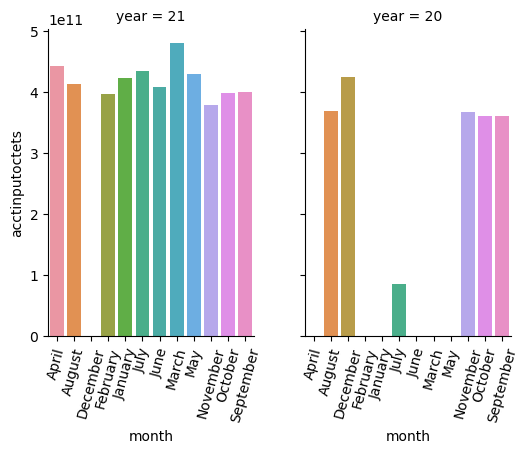

In [115]:
ax = sns.catplot(x="month", y="acctinputoctets", col="year",
                 data=mnthly_uploads, kind="bar",
                 height=4, aspect=.7)
ax.set_xticklabels(rotation=75)

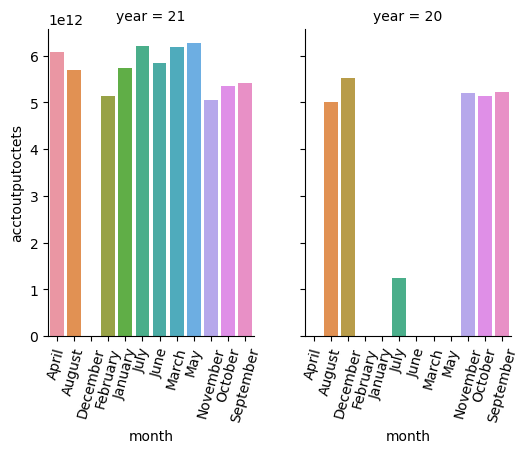

In [116]:
ax = sns.catplot(x="month", y="acctoutputoctets", col="year",
                 data=mnthly_uploads, kind="bar",
                 height=4, aspect=.7)
ax.set_xticklabels(rotation=75)

In [117]:
mnthly_uploads2 = pd.concat([mnthly_uploads, mnthly_uploads], axis=0)
mnthly_uploads2.reset_index(inplace=True)
mnthly_uploads2.drop('index', axis=1, inplace=True)

mnthly_uploads2.iloc[17:34,2] = mnthly_uploads2.iloc[0:17,3]

mnthly_uploads2.iloc[17:34,3] = 'output'
mnthly_uploads2.iloc[0:17,3] = 'input'

mnthly_uploads2.columns = ['month', 'year', 'value', 'acctoctets', 'week_number']
mnthly_uploads2

,month,year,value,acctoctets,week_number
0,April,21,443005320453.1,input,23530581
1,August,20,369464566041.6,input,42517367
2,August,21,413235690601.6,input,52955982
3,December,20,424921150913.2,input,59539192
4,February,21,397459168673.5,input,9897334
5,January,21,422555619482.5,input,8414678
6,July,20,85210538090.4,input,10320901
7,July,21,434733464811.1,input,47718895
8,June,21,407880630609.8,input,37095694
9,March,21,479896584755.6,input,18870028


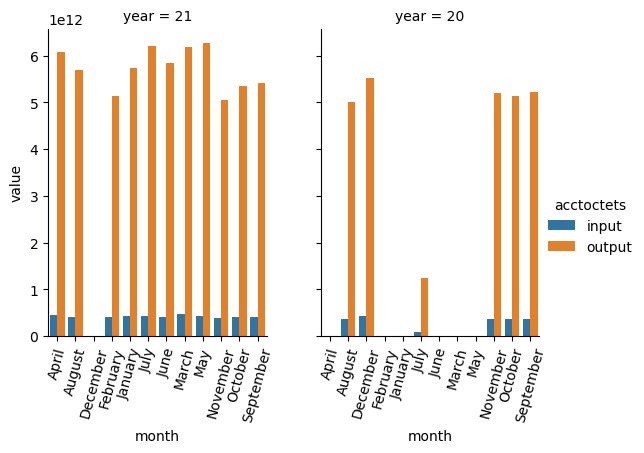

In [118]:
ax = sns.catplot(x="month", y="value",
                 hue="acctoctets", col="year",
                 data=mnthly_uploads2, kind="bar",
                 height=4, aspect=.7)
ax.set_xticklabels(rotation=75)

In [ ]:
#splitting into yeaes
#mnthly_uploads['per_year'] = mnthly_uploads.year.apply(pd.Series).add_prefix('year_')
radacct_extract[['year_20', 'year_21']] = radacct_extract['year'].apply(lambda x: pd.Series(str(x).split(" ")))

In [17]:
uploads_2020 = mnthly_uploads.groupby('year').sum()
uploads_2020

,Unnamed: 0,acctinputoctets,acctoutputoctets,week_number
year,,,,
20,22279698240276,1967413360133102,27319494894136960,275245652
21,321768576765939,4606354690781828,62940043857636232,532154605
